# Seidel Switching Markov Chain #
I am making a Markov Chain over the graph Switchings up to isomorphism of graphs on 4 vertices. At each step, I will move to a new graph by performing a switching on one of it's vertices uniformly at random. First, I will generate what each graph is,for reference. After this, I will write out the transition matrix and find the steady states.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

#### Here are the graphs on four vertices up to isomorphism.

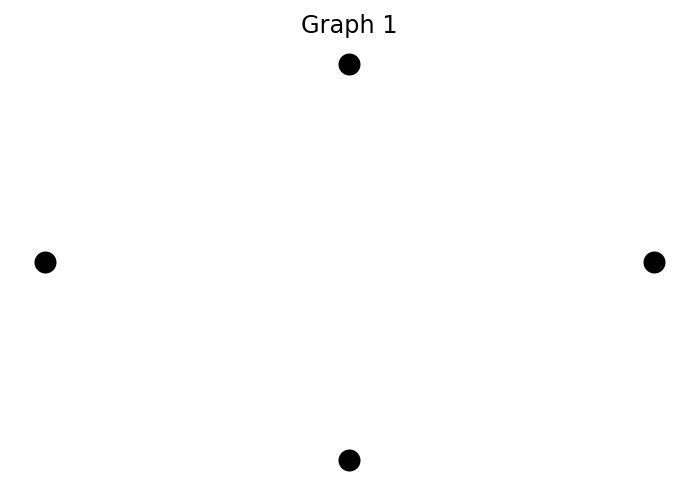

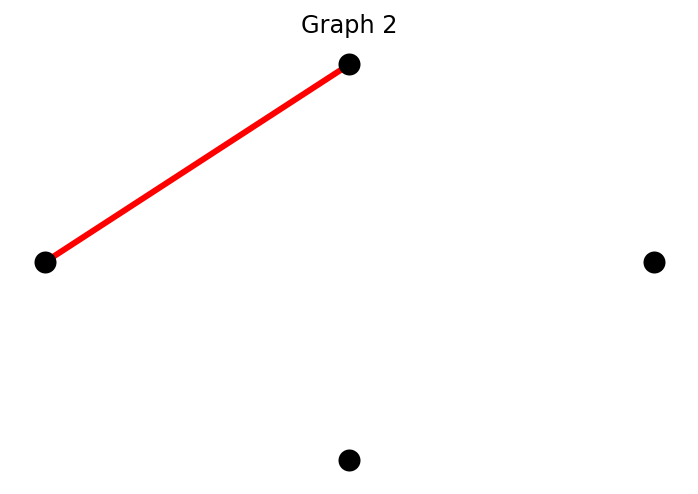

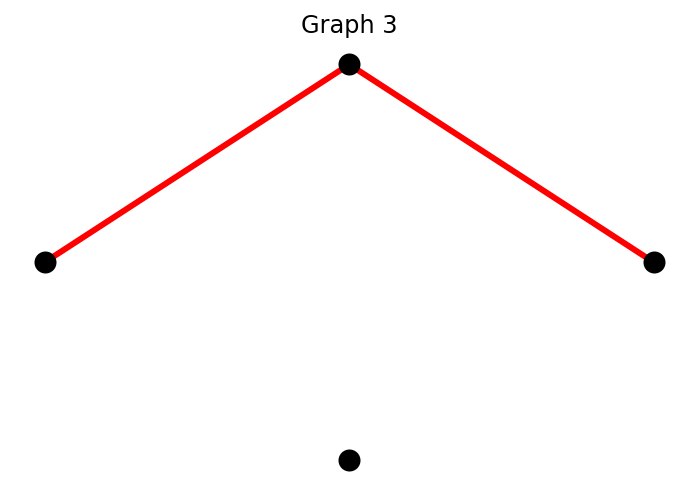

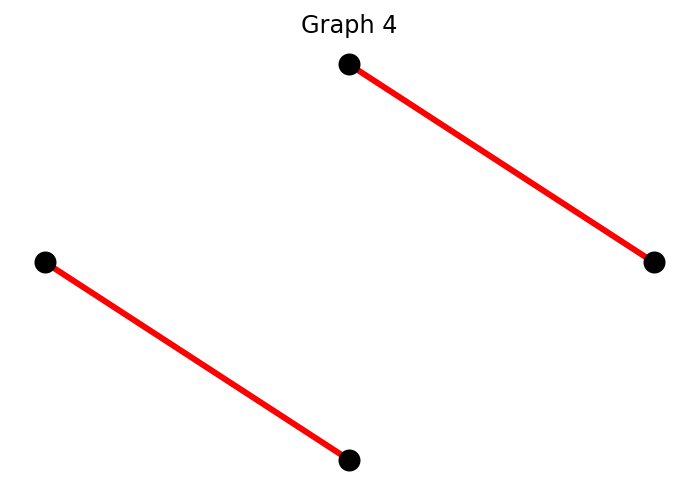

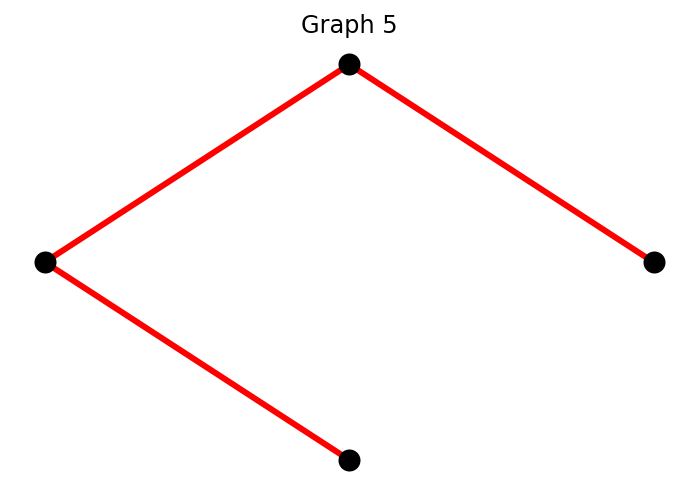

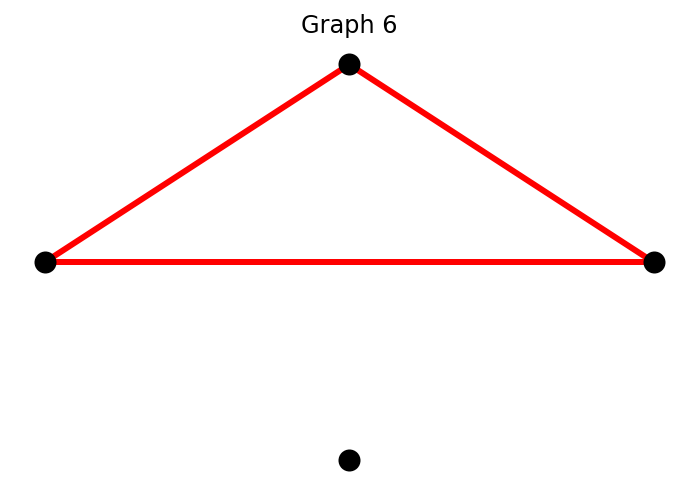

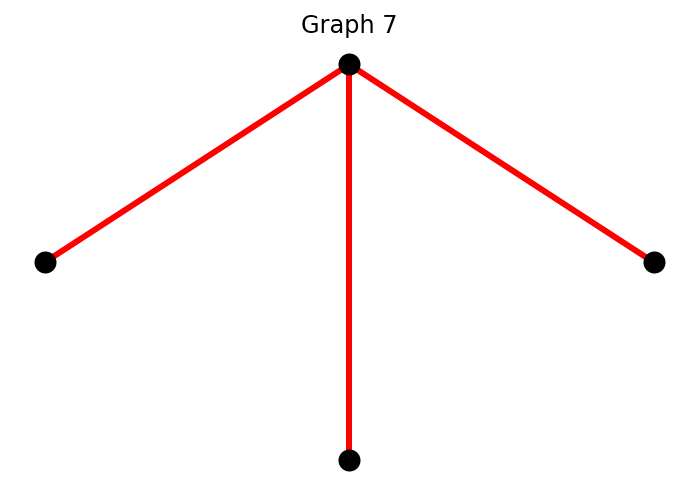

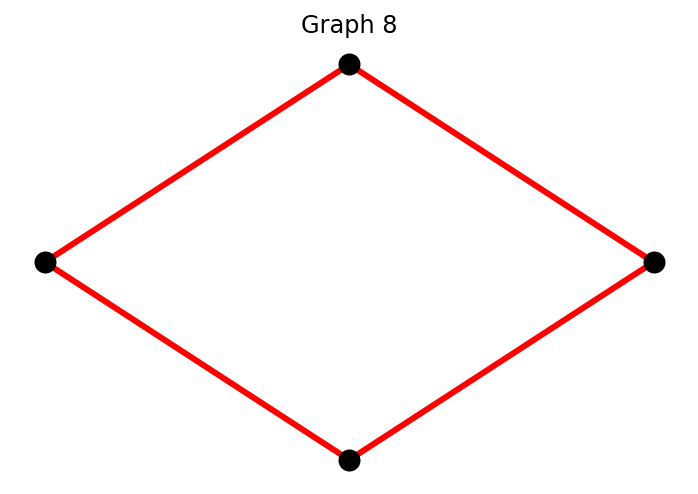

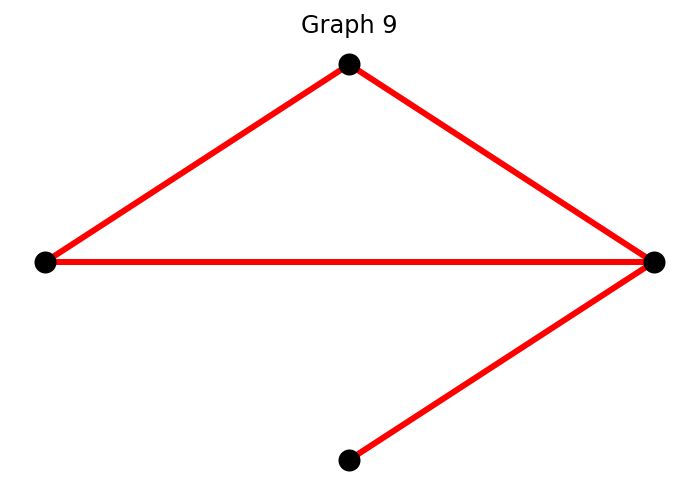

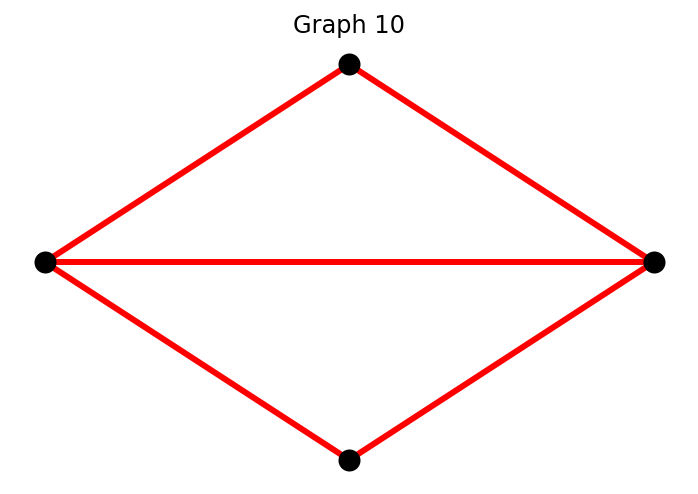

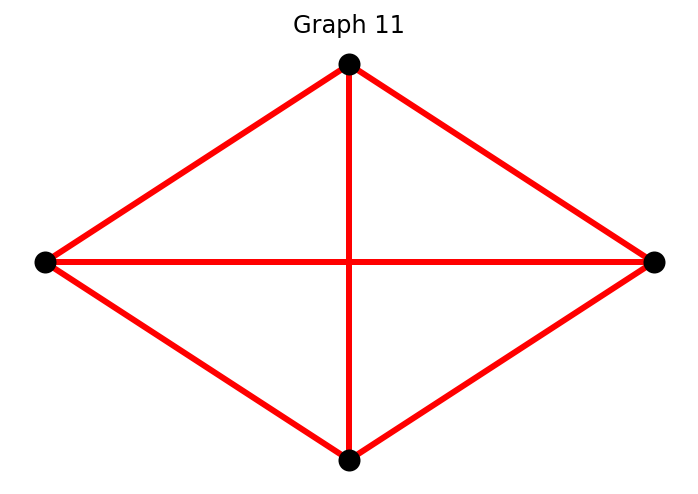

In [2]:
Graphs = []

#Empty Graph
G1 = nx.empty_graph(n=4)
Graphs.append(G1)

#P1
G2 = nx.empty_graph(n=4)
G2.add_edge(1,2)
Graphs.append(G2)

#P2
G3 = nx.empty_graph(n=4)
G3.add_edges_from([(0,1),(1,2)])
Graphs.append(G3)

#P2 + P2
G4 = nx.empty_graph(n=4)
G4.add_edges_from([(0,1),(2,3)])
Graphs.append(G4)

#P3
G5 = nx.path_graph(n=4)
Graphs.append(G5)

#C3
G6 = nx.cycle_graph(n=3)
G6.add_node(3)
Graphs.append(G6)

#Claw
G7 = nx.empty_graph(n=4)
G7.add_edges_from([(0,1),(1,2),(1,3)])
Graphs.append(G7)

#C4
G8 = nx.cycle_graph(n=4)
Graphs.append(G8)

#Paw
G9 = nx.cycle_graph(n=3)
G9.add_node(3)
G9.add_edge(0,3)
Graphs.append(G9)

#Diamond
G10 = nx.cycle_graph(n=4)
G10.add_edge(0,2)
Graphs.append(G10)

#K4
G11 = nx.complete_graph(n=4)
Graphs.append(G11)

for i in range(len(Graphs)):
    pos = nx.circular_layout(Graphs[i])
    plt.figure()
    ax = plt.gca()
    ax.set_title('Graph ' + str(i+1))
    nx.draw(Graphs[i],pos,node_size=100,node_color='black',edge_color='red',width=3)

#### Now, I will create functions to determine the steady states and long term probabilities of ending in a given state.

In [3]:
def Steady(P):
    '''This will return the steady state vectors of transition matrix P'''
    P = np.array(P).transpose()

    eigval,eigvec = np.linalg.eig(P)

    #This error is necessary since Numpy does not have exact values for eigenvalues
    error = 0.0001

    steadyState = []
    finalProbabilities= np.array([0,0,0,0,0,0,0,0,0,0,0])
    for i in range(len(eigval)):
        if eigval[i] <= 1 + error and eigval[i] >= 1 - error:
            #Numpy will return some steady state vectors as all negative
            x = np.absolute(eigvec[:,i])
            #This makes sure the steady state vectors sum to 1
            x = x / np.sum(x)
            steadyState.append(x)
            
    return(steadyState)

def LongProb(P):
    '''This will return the long term probabilities of ending in a given state, assuming every starting state is equally likely'''
    P = np.array(P).transpose()

    eigval,eigvec = np.linalg.eig(P)

    #This error is necessary since Numpy does not have exact values for eigenvalues
    error = 0.0001
    
    y = np.zeros(len(P))
    steadyState = []
    finalProbabilities= np.array([0,0,0,0,0,0,0,0,0,0,0])
    for i in range(len(eigval)):
        if eigval[i] <= 1 + error and eigval[i] >= 1 - error:
            #Numpy will return some steady state vectors as all negative
            x = np.absolute(eigvec[:,i])
            #This makes sure the steady state vectors sum to 1
            x = x / np.sum(x)
            y += x * np.count_nonzero(x)/len(P)
            
    return(y)

#### Assuming the starting node is chosen uniformly at random, here are the results for the graphs on four vertices:

In [5]:
P = [[0,0,0,0,0,0,1,0,0,0,0],
    [0,0,1/2,0,0,0,0,0,1/2,0,0,],
    [0,1/4,0,0,1/2,0,0,0,0,1/4,0],
    [0,0,0,0,0,1,0,0,0,0,0],
    [0,0,1/2,0,0,0,0,0,1/2,0,0],
    [0,0,0,3/4,0,0,0,0,0,0,1/4],
    [1/4,0,0,0,0,0,0,3/4,0,0,0],
    [0,0,0,0,0,0,1,0,0,0,0],
    [0,1/4,0,0,1/2,0,0,0,0,1/4,0],
    [0,0,1/2,0,0,0,0,0,1/2,0,0],
    [0,0,0,0,0,1,0,0,0,0,0]]

print(Steady(P))
print(LongProb(P))

[array([0.125, 0.   , 0.   , 0.   , 0.   , 0.   , 0.5  , 0.375, 0.   ,
       0.   , 0.   ]), array([0.   , 0.   , 0.   , 0.375, 0.   , 0.5  , 0.   , 0.   , 0.   ,
       0.   , 0.125]), array([0.   , 0.125, 0.25 , 0.   , 0.25 , 0.   , 0.   , 0.   , 0.25 ,
       0.125, 0.   ])]
[0.03409091 0.05681818 0.11363636 0.10227273 0.11363636 0.13636364
 0.13636364 0.10227273 0.11363636 0.05681818 0.03409091]
